In [ ]:
import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": ["snowfall"],
    "year": ["1960", "1961", "1962", "1963", "1964", "1965"],
    "month": ["01", "02"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "grib",
    "download_format": "unarchived",
    "area": [55, 13.5, 48.8, 24.5]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()



In [ ]:
import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": ["snowfall"],
    "year": ["1960", "1961", "1962", "1963", "1964", "1965"],
    "month": ["11", "12"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "grib",
    "download_format": "unarchived",
    "area": [55, 13.5, 48.8, 24.5]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

In [ ]:
import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": ["snowfall"],
    "year": ["1960", "1961", "1962", "1963", "1964", "1965"],
    "month": ["03", "10"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "grib",
    "download_format": "unarchived",
    "area": [55, 13.5, 48.8, 24.5]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

In [ ]:
import xarray as xr
import pandas as pdf
import numpy as np

ds1 = xr.open_dataset('cccb9dbcad07b70bb3d52307c6a988cd.grib', engine="cfgrib")
ds2 = xr.open_dataset('5eb4bf1c0eede8d600714600e901b1b8.grib', engine="cfgrib")
ds3 = xr.open_dataset('3de59aa3670d3f976dcaf2385086dc41.grib', engine="cfgrib")

ds = xr.concat([ds1, ds2], dim="time")
ds = xr.concat([ds3, ds], dim="time")

ds = ds.fillna(0)
df = ds.to_dataframe().reset_index()
df['year'] = df.time.dt.year
df = df[df.year != 1959].sort_values(['latitude', 'longitude', 'valid_time'])

daily_sum_snow = df.groupby(['time', 'latitude', 'longitude']).tail(1)
annual_sum_snow = daily_sum_snow.groupby(['year', 'latitude', 'longitude']).sf.sum().reset_index(name = 'suma')
sum_snow = annual_sum_snow.groupby(['latitude', 'longitude']).suma.mean().reset_index(name = 'snow')
sum_snow['snow'] = sum_snow['snow'] * 700

pivot = sum_snow.pivot(index='latitude', columns='longitude', values='snow')
lats = pivot.index.values
lons = pivot.columns.values
snow = pivot.values

snow

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

# Wczytanie granic województw
shapefile_path = "wojewodztwa/wojewodztwa.shp"
wojewodztwa = gpd.read_file(shapefile_path)
wojewodztwa = wojewodztwa.to_crs(epsg=4326) 


fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': ccrs.PlateCarree()})
mesh = ax.contourf(lons, lats, snow, transform=ccrs.PlateCarree(), cmap="PuBu", levels=15, alpha=1)

# Dodanie granic Polski
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.set_aspect(1.5)
wojewodztwa.boundary.plot(ax=ax, edgecolor="black", linewidth=0.15)

# Pasek kolorów
cbar = plt.colorbar(mesh, ax=ax, label="Średnia suma", shrink = 0.6)
cbar.ax.set_ylabel("Suma opadów śniegu (cm)", fontsize=12, weight='bold')



ax.set_title(
    "Średnia suma opadów śniegu w latach 1960-1965",
    fontsize=14,
    fontweight='bold',
    family='Arial',      
    loc='center',
    pad=15
)

miasta = {
    "Warszawa": (21.0175, 52.2370),
    "Kraków": (19.9383, 50.0614),
    "Łódź": (19.4586, 51.7592),
    "Wrocław": (17.0385, 51.1079),
    "Poznań": (16.9299, 52.4064),
    "Gdańsk": (18.6466, 54.3520),
    "Szczecin": (14.5528, 53.4285),
    "Bydgoszcz": (18.0065, 53.1235),
    "Toruń": (18.6120, 53.0138),  
    "Lublin": (22.5667, 51.2500),
    "Białystok": (23.1688, 53.1331),
    "Katowice": (19.0238, 50.2649),
    "Gorzów Wlkp.": (15.2384, 52.7300),
    "Zielona Góra": (15.5050, 51.9356),  
    "Opole": (17.9313, 50.6676),
    "Kielce": (20.6286, 50.8703),
    "Rzeszów": (22.0047, 50.0413),
    "Olsztyn": (20.4942, 53.7784),
}


miasta_lons, miasta_lats = zip(*miasta.values())
ax.scatter(miasta_lons, miasta_lats, color="red", s=7, marker="o", transform=ccrs.PlateCarree(), label="Miasta wojewódzkie")
for name, (lon, lat) in miasta.items():
    if name in ["Toruń", "Rzeszów", "Kraków", "Gdańsk"]:
        ax.text(lon, lat, name, fontsize=7, transform=ccrs.PlateCarree(), ha="right", va="top", color="black")
    else:
        ax.text(lon, lat, name, fontsize=7, transform=ccrs.PlateCarree(), ha="right", va="bottom", color="black")


plt.savefig("plot004.png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": ["snowfall"],
    "year": ["2019", "2020", "2021", "2022", "2023", "2024"],
    "month": ["01", "02"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "grib",
    "download_format": "unarchived",
    "area": [55, 13.5, 48.8, 24.5]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


In [ ]:
import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": ["snowfall"],
    "year": ["2019", "2020", "2021", "2022", "2023", "2024"],
    "month": ["11", "12"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "grib",
    "download_format": "unarchived",
    "area": [55, 13.5, 48.8, 24.5]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

In [ ]:
import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": ["snowfall"],
    "year": ["2019", "2020", "2021", "2022", "2023", "2024"],
    "month": ["03", "10"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "grib",
    "download_format": "unarchived",
    "area": [55, 13.5, 48.8, 24.5]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

In [ ]:
import xarray as xr
import pandas as pd

ds1 = xr.open_dataset('f1cea0e861f6a845b473f0b06c002d69.grib', engine="cfgrib")
ds2 = xr.open_dataset('b532f79ad1177351859841e4c5e0fce8.grib', engine="cfgrib")
ds3 = xr.open_dataset('510b797d7dfdf2709b5730d6b289ab47.grib', engine="cfgrib")

ds = xr.concat([ds1, ds2], dim="time")
ds = xr.concat([ds3, ds], dim="time")

ds = ds.fillna(0)
df = ds.to_dataframe().reset_index()
df['year'] = df.time.dt.year
df = df[df.year != 2018].sort_values(['latitude', 'longitude', 'valid_time'])

daily_sum_snow = df.groupby(['time', 'latitude', 'longitude']).tail(1)
annual_sum_snow = daily_sum_snow.groupby(['year', 'latitude', 'longitude']).sf.sum().reset_index(name = 'suma')
sum_snow = annual_sum_snow.groupby(['latitude', 'longitude']).suma.mean().reset_index(name = 'snow')
sum_snow['snow'] = sum_snow['snow'] * 700

pivot = sum_snow.pivot(index='latitude', columns='longitude', values='snow')
lats = pivot.index.values
lons = pivot.columns.values
snow = pivot.values

snow

array([[119.24462 , 124.89566 , 119.081505, ..., 121.88445 , 110.28631 ,
         99.12262 ],
       [138.62395 , 129.10498 , 119.332245, ..., 103.02082 ,  96.60293 ,
         88.839294],
       [148.84619 , 133.27959 , 120.195595, ...,  89.014984,  83.49926 ,
         78.037704],
       ...,
       [  0.      ,   0.      ,   0.      , ...,  72.81487 ,  74.54654 ,
         76.60265 ],
       [  0.      ,   0.      ,   0.      , ...,  70.0605  ,  71.903076,
         74.00058 ],
       [  0.      ,   0.      ,   0.      , ...,  69.32278 ,  70.94039 ,
         73.244835]], shape=(63, 111), dtype=float32)

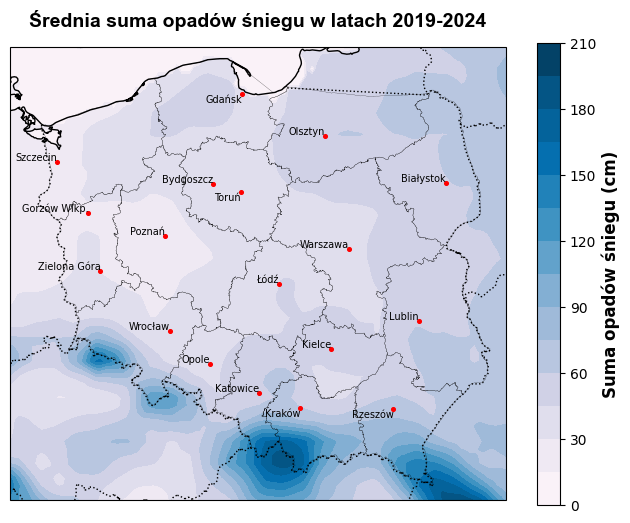

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np

#lons = ds.longitude
#lats = ds.latitude


shapefile_path = "wojewodztwa/wojewodztwa.shp"
wojewodztwa = gpd.read_file(shapefile_path)
wojewodztwa = wojewodztwa.to_crs(epsg=4326) 


fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': ccrs.PlateCarree()})
mesh = ax.contourf(lons, lats, snow, transform=ccrs.PlateCarree(), cmap="PuBu", levels=np.arange(0, 211, 15), alpha = 1)


ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.set_aspect(1.5)

wojewodztwa.boundary.plot(ax=ax, edgecolor="black", linewidth=0.15)

cbar = plt.colorbar(mesh, ax=ax, label="Średnia suma", shrink = 0.6, ticks = np.arange(0, 211, 30))
cbar.ax.set_ylabel("Suma opadów śniegu (cm)", fontsize=12, weight="bold")


ax.set_title(
    "Średnia suma opadów śniegu w latach 2019-2024",
    fontsize=14,
    fontweight='bold',
    family='Arial',      
    loc='center',
    pad=15
)

miasta = {
    "Warszawa": (21.0175, 52.2370),
    "Kraków": (19.9383, 50.0614),
    "Łódź": (19.4586, 51.7592),
    "Wrocław": (17.0385, 51.1079),
    "Poznań": (16.9299, 52.4064),
    "Gdańsk": (18.6466, 54.3520),
    "Szczecin": (14.5528, 53.4285),
    "Bydgoszcz": (18.0065, 53.1235),
    "Toruń": (18.6120, 53.0138),  
    "Lublin": (22.5667, 51.2500),
    "Białystok": (23.1688, 53.1331),
    "Katowice": (19.0238, 50.2649),
    "Gorzów Wlkp.": (15.2384, 52.7300),
    "Zielona Góra": (15.5050, 51.9356),  
    "Opole": (17.9313, 50.6676),
    "Kielce": (20.6286, 50.8703),
    "Rzeszów": (22.0047, 50.0413),
    "Olsztyn": (20.4942, 53.7784),
}


miasta_lons, miasta_lats = zip(*miasta.values())
ax.scatter(miasta_lons, miasta_lats, color="red", s=7, marker="o", transform=ccrs.PlateCarree(), label="Miasta wojewódzkie")

for name, (lon, lat) in miasta.items():
    if name in ["Toruń", "Rzeszów", "Kraków", "Gdańsk"]:
        ax.text(lon, lat, name, fontsize=7, transform=ccrs.PlateCarree(), ha="right", va="top", color="black")
    else:
        ax.text(lon, lat, name, fontsize=7, transform=ccrs.PlateCarree(), ha="right", va="bottom", color="black")

plt.savefig("plot005.png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()
